$\Large\color{red}{\text{Announce: ebook "PyGMTSAR: Sentinel-1 Python InSAR: An Introduction"}}$
$\Large\color{red}{\text{is now available on Amazon, Apple, Kobo and many other bookstores.}}$

$\Large\color{blue}{\text{PyGMTSAR Small Baseline Subset (SBAS) Interferometric InSAR}}$
$\Large\color{blue}{\text{Sentinel-1 Scenes Downloading from Alaska Satellite Facility (ASF)}}$

### Look for more PyGMTSAR examples:

* Google Colab - see GitHub page for [notebooks](https://github.com/mobigroup/gmtsar),

* Docker Images on [DockerHub](https://hub.docker.com/r/mobigroup/pygmtsar),

* GitHub [notebooks](https://github.com/mobigroup/gmtsar/tree/master/notebooks),

* GitHub Actions [console scripts](https://github.com/mobigroup/gmtsar/actions),

* Google Cloud VM -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/),

* Linux Debian and Ubuntu -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/),

* Apple Silicon and Intel hosts -  follow [PyGMTSAR documentation](https://mobigroup.github.io/gmtsar/).


### PyGMTSAR InSAR library, Geomed3D Geophysical Inversion Library, N-Cube 3D/4D GIS Data Visualization, etc. are my free-time Open Source projects.

I have STEM master’s degree in radio physics and in 2004 I have got the first prize of the All-Russian Physics competition for significant results in forward and inverse modeling for non-linear optics and holography, also applicable for modeling of Gravity, Magnetic, and Thermal fields and satellite interferometry processing. And I’m data scientist and software developer with 20 year’s experience in science and industrial development. I had been working on government contracts and universities projects and on projects for LG Corp, Google Inc, etc.

### You can sponsor my work on [Patreon](https://www.patreon.com/pechnikov) where I share my projects updates, publications, use cases, examples, and other useful information. To order some research and development and support, see my profile on freelance platform [Upwork](https://www.upwork.com/freelancers/~01e65e8e7221758623).

### Resources

* [Patreon](https://www.patreon.com/pechnikov),

* [YouTube Geological Models](https://www.youtube.com/channel/UCSEeXKAn9f_bDiTjT6l87Lg),

* [Virtual and Augmented Reality (VR/AR) Geological Models](https://mobigroup.github.io/ParaView-Blender-AR/),

* [GitHub](https://github.com/mobigroup),

* [LinkedIn](https://www.linkedin.com/in/alexey-pechnikov/),

* [Medium](https://medium.com/@pechnikov),

* [Habr](https://habr.com/ru/users/N-Cube/posts/).

### @ Alexey Pechnikov, 2023

$\large\color{blue}{\text{Hint: Use menu Cell} \to \text{Run All or Runtime} \to \text{Complete All or Runtime} \to \text{Run All}}$
$\large\color{blue}{\text{(depending of your localization settings) to execute the entire notebook}}$

## Load Modules to Check Environment

In [ ]:
import platform, sys, os

## Google Colab Installation

### Install GMTSAR
https://github.com/gmtsar/gmtsar

In [ ]:
if 'google.colab' in sys.modules:
    count = !ls /usr/local | grep GMTSAR | wc -l
    if count == ['0']:
        !export DEBIAN_FRONTEND=noninteractive
        !apt-get update > /dev/null
        !apt install -y csh autoconf gfortran \
            libtiff5-dev libhdf5-dev liblapack-dev libgmt-dev gmt-dcw gmt-gshhg gmt  > /dev/null
        # GMTSAR codes are not so good to be compiled by modern GCC
        !apt install gcc-9 > /dev/null
        !update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 10
        !update-alternatives --config gcc
        !gcc --version | head -n 1
        !rm -fr /usr/local/GMTSAR
        !git config --global advice.detachedHead false
        !cd /usr/local && git clone -q --branch master https://github.com/gmtsar/gmtsar GMTSAR
        # revert recent broken commit
        !cd /usr/local/GMTSAR && git checkout e98ebc0f4164939a4780b1534bac186924d7c998 > /dev/null
        !cd /usr/local/GMTSAR && autoconf > /dev/null
        !cd /usr/local/GMTSAR && ./configure --with-orbits-dir=/tmp > /dev/null
        !cd /usr/local/GMTSAR && make 1>/dev/null 2>/dev/null
        !cd /usr/local/GMTSAR && make install >/dev/null
        # fix for missed script, use bash instead of csh interpretator
        # note: csh messes stdout and stderr in Docker environment, it's resolved in PyGMTSAR code
        !echo '#!/bin/sh' > /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !echo echo /usr/local/GMTSAR/share/gmtsar >> /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !chmod a+x /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !/usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        # test one GMTSAR binary
        !/usr/local/GMTSAR/bin/make_s1a_tops 2>&1 | head -n 2





update-alternatives: using /usr/bin/gcc-9 to provide /usr/bin/gcc (gcc) in auto mode
There is only one alternative in link group gcc (providing /usr/bin/gcc): /usr/bin/gcc-9
Nothing to configure.
gcc (Ubuntu 9.5.0-1ubuntu1~22.04) 9.5.0
HEAD is now at e98ebc0 extending solid_tide to 2050 as leap seconds are abandoned hopefully
/usr/local/GMTSAR/share/gmtsar
 
Usage: make_slc_s1a_tops xml_file tiff_file output mode dr.grd da.grd


In [ ]:
import sys
if 'google.colab' in sys.modules:
    !apt install -y xvfb > /dev/null
    !{sys.executable} -m pip install pyvista > /dev/null
    !{sys.executable} -m pip install xvfbwrapper > /dev/null
    import xvfbwrapper
    !pip install pyvista panel -q

import panel as pn
import os
pn.extension('vtk')
display = xvfbwrapper.Xvfb(width=800, height=600)
display.start()
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

### Define ENV Variables for Jupyter Instance

In [ ]:
# use default GMTSAR installation path
PATH = os.environ['PATH']
if PATH.find('GMTSAR') == -1:
    PATH = os.environ['PATH'] + ':/usr/local/GMTSAR/bin/'
    %env PATH {PATH}

env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/GMTSAR/bin/


### Install Python Modules

Maybe you need to restart your notebook, follow the instructions printing below.

The installation takes a long time on fresh Debian 10 and a short time on Google Colab

In [ ]:
!{sys.executable} --version

Python 3.10.12


In [ ]:
if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install matplotlib seaborn bokeh >/dev/null

In [ ]:
if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install -q git+https://github.com/mobigroup/gmtsar.git@pygmtsar2#subdirectory=pygmtsar

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.8/345.8 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.8 MB/s et

## Load and Setup Python Modules

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
from dask.distributed import Client
import dask
import warnings

In [ ]:
# plotting modules
import pyvista as pv
# magic trick for white background
pv.set_plot_theme("document")
import panel
panel.extension('vtk')
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
from pygmtsar import S1, Stack, tqdm_dask, NCubeVTK, ASF

## Define Sentinel-1 SLC Scenes and Processing Parameters

In [ ]:
SCENES = ['S1B_IW_SLC__1SDV_20180601T083607_20180601T083637_011177_014814_EB1A',
          'S1B_IW_SLC__1SDV_20180613T083608_20180613T083638_011352_014D81_582B',
          'S1B_IW_SLC__1SDV_20180625T083609_20180625T083639_011527_0152F3_17DA',
          'S1B_IW_SLC__1SDV_20180707T083610_20180707T083640_011702_015864_F73C',
          'S1B_IW_SLC__1SDV_20180719T083611_20180719T083641_011877_015DC3_6D2B',]
SUBSWATH = 12
POLARIZATION = 'VV'

In [ ]:
REFERENCE    = '2018-06-01'
WORKDIR      = 'raw_stack'
DATADIR      = 'raw_orig'
BASEDAYS     = 100
BASEMETERS   = 150

## Download and Unpack Datasets

## Enter Your ASF (Earthdata) User and Password

If the data directory is empty or doesn't exist, you'll need to download Sentinel-1 scenes from the Alaska Satellite Facility (ASF) datastore. Use your Earthdata Login credentials. If you don't have an Earthdata Login, you can create one at https://urs.earthdata.nasa.gov//users/new

You can also use pre-existing SLC scenes stored on your Google Drive, or you can copy them using a direct public link from iCloud Drive.

The credentials below are available at the time the notebook is validated. Special symbols, like underscores, are required in your ASF password.

In [ ]:
# Set these variables to None and you will be prompted to enter your username and password below.
username = 'thmrs'
password = 'alfaUM01'

In [ ]:
# download required polarization and subswaths only
asf = ASF(username, password)
asf.download(DATADIR, SCENES, SUBSWATH, POLARIZATION)

ASF Downloading Sentinel-1 SLC:   0%|          | 0/5 [00:00<?, ?it/s]

ASF Downloading Sentinel-1 Orbits:   0%|          | 0/5 [00:00<?, ?it/s]

,scene,orbit
0,https://datapool.asf.alaska.edu/SLC/SB/S1B_IW_...,https://s1qc.asf.alaska.edu/aux_poeorb/S1B_OPE...
1,https://datapool.asf.alaska.edu/SLC/SB/S1B_IW_...,https://s1qc.asf.alaska.edu/aux_poeorb/S1B_OPE...
2,https://datapool.asf.alaska.edu/SLC/SB/S1B_IW_...,https://s1qc.asf.alaska.edu/aux_poeorb/S1B_OPE...
3,https://datapool.asf.alaska.edu/SLC/SB/S1B_IW_...,https://s1qc.asf.alaska.edu/aux_poeorb/S1B_OPE...
4,https://datapool.asf.alaska.edu/SLC/SB/S1B_IW_...,https://s1qc.asf.alaska.edu/aux_poeorb/S1B_OPE...


## Run Local Dask Cluster

Launch Dask cluster for local and distributed multicore computing. That's possible to process terabyte scale Sentinel-1 SLC datasets on Apple Air 16 GB RAM.

In [ ]:
# simple Dask initialization
if 'client' in globals():
    client.close()
client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:36553
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43677'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39833'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:38707', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:38707
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40480
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40263', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40263
INFO:distributed.core:Sta

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 2
Total threads: 2,Total memory: 12.68 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36553,Workers: 2
Dashboard: http://127.0.0.1:8787/status,Total threads: 2
Started: Just now,Total memory: 12.68 GiB
Comm: tcp://127.0.0.1:38707,Total threads: 1
Dashboard: http://127.0.0.1:35351/status,Memory: 6.34 GiB
Nanny: tcp://127.0.0.1:43677,


## Init

Search recursively for measurement (.tiff) and annotation (.xml) and orbit (.EOF) files in the DATA directory. It can be directory with full unzipped scenes (.SAFE) subdirectories or just a directory with the list of pairs of required .tiff and .xml files (maybe pre-filtered for orbit, polarization and subswath to save disk space). If orbit files and DEM are missed these will be downloaded automatically below.

In [ ]:
scenes = S1.scan_slc(DATADIR)
scenes

,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2018-06-01,2018-06-01 08:36:07,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T094...,"MULTIPOLYGON (((-44.66808 -15.14536, -44.71112..."
2018-06-01,2018-06-01 08:36:08,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T094...,"MULTIPOLYGON (((-45.43851 -15.03010, -45.48251..."
2018-06-13,2018-06-13 08:36:08,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T131...,"MULTIPOLYGON (((-44.66914 -15.14525, -44.71217..."
2018-06-13,2018-06-13 08:36:09,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T131...,"MULTIPOLYGON (((-45.43948 -15.02989, -45.48348..."
2018-06-25,2018-06-25 08:36:09,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T163...,"MULTIPOLYGON (((-44.66870 -15.14567, -44.71174..."
2018-06-25,2018-06-25 08:36:10,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T163...,"MULTIPOLYGON (((-45.43909 -15.03031, -45.48309..."
2018-07-07,2018-07-07 08:36:10,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T195...,"MULTIPOLYGON (((-44.66961 -15.14519, -44.71265..."
2018-07-07,2018-07-07 08:36:11,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T195...,"MULTIPOLYGON (((-45.43996 -15.02982, -45.48396..."
2018-07-19,2018-07-19 08:36:11,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180719T083611_2018...,raw_orig/S1B_IW_SLC__1SDV_20180719T083611_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T232...,"MULTIPOLYGON (((-44.66988 -15.14521, -44.71292..."


In [ ]:
sbas = Stack(WORKDIR, drop_if_exists=True).set_scenes(scenes).set_reference(REFERENCE)
sbas.to_dataframe()

NOTE: auto set reference scene 2018-06-01. You can change it like Stack.set_reference("2022-01-20")


,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2018-06-01,2018-06-01 08:36:07,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T094...,"MULTIPOLYGON (((-44.66808 -15.14536, -44.71112..."
2018-06-01,2018-06-01 08:36:08,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_IW_SLC__1SDV_20180601T083607_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T094...,"MULTIPOLYGON (((-45.43851 -15.03010, -45.48251..."
2018-06-13,2018-06-13 08:36:08,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T131...,"MULTIPOLYGON (((-44.66914 -15.14525, -44.71217..."
2018-06-13,2018-06-13 08:36:09,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_IW_SLC__1SDV_20180613T083608_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T131...,"MULTIPOLYGON (((-45.43948 -15.02989, -45.48348..."
2018-06-25,2018-06-25 08:36:09,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T163...,"MULTIPOLYGON (((-44.66870 -15.14567, -44.71174..."
2018-06-25,2018-06-25 08:36:10,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_IW_SLC__1SDV_20180625T083609_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T163...,"MULTIPOLYGON (((-45.43909 -15.03031, -45.48309..."
2018-07-07,2018-07-07 08:36:10,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T195...,"MULTIPOLYGON (((-44.66961 -15.14519, -44.71265..."
2018-07-07,2018-07-07 08:36:11,D,S1B,VV,2,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_IW_SLC__1SDV_20180707T083610_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T195...,"MULTIPOLYGON (((-45.43996 -15.02982, -45.48396..."
2018-07-19,2018-07-19 08:36:11,D,S1B,VV,1,raw_orig/S1B_IW_SLC__1SDV_20180719T083611_2018...,raw_orig/S1B_IW_SLC__1SDV_20180719T083611_2018...,raw_orig/S1B_OPER_AUX_POEORB_OPOD_20210313T232...,"MULTIPOLYGON (((-44.66988 -15.14521, -44.71292..."


In [ ]:
import json
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [[[-46.2751,-15.8036], [-45.3057,-16.7775], [-44.8995,-16.4242], [-45.8442,-15.5163], [-46.2751,-15.8036]]]
  },
  "properties": {}
}
'''
AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

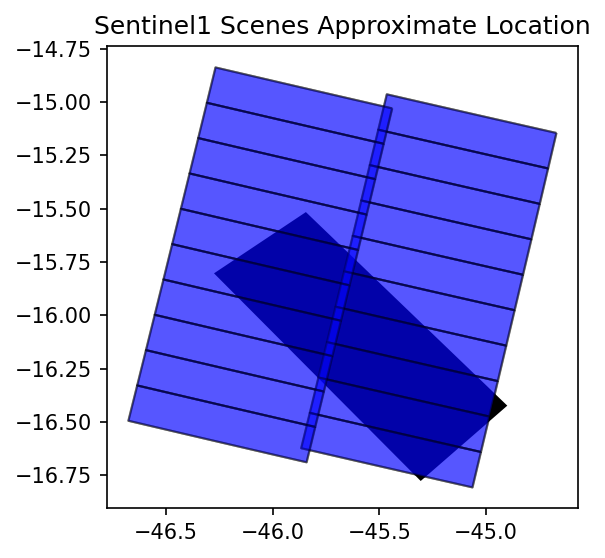

In [ ]:
plt.figure(figsize=(8, 4), dpi=150)
gdf = sbas.to_dataframe()
cmap = matplotlib.colormaps['bwr']
colors = dict([(v, cmap(k)) for k, v in enumerate(gdf.index.unique())])
AOI.plot(ax=plt.gca(), color='black')
gdf.reset_index().plot(color=[colors[k] for k in gdf.index], alpha=0.2, edgecolor='black', ax=plt.gca())
plt.title('Sentinel1 Scenes Approximate Location', fontsize=12)
plt.show()

### Download SRTM DEM

The function below downloads SRTM1 or SRTM3 DEM and converts heights to ellipsoidal model using EGM96 grid.
Besides, for faster processing we can use pre-defined DEM file as explained above. Select product=SRTM1 for 30m resolution and product=SRTM3 for 90m resolution SRTM DEM.

In [ ]:
sbas.download_dem()

DEM Downloading:   0%|          | 0/1 [00:00<?, ?it/s]

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): S17W047
INFO:distributed.scheduler:Receive client connection: Client-worker-230acfb5-81ba-11ee-95a9-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59602


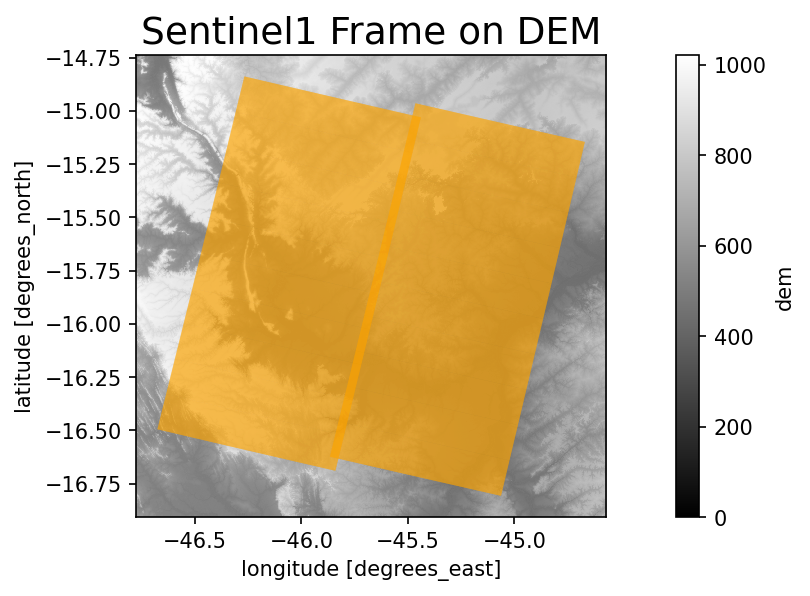

In [ ]:
plt.figure(figsize=(12,4), dpi=150)
dem = sbas.get_dem()
dem[::4,::4].plot.imshow(cmap='gray', vmin=0)
sbas.to_dataframe().plot(color='orange', alpha=0.2, ax=plt.gca())
plt.title('Sentinel1 Frame on DEM', fontsize=18)
plt.show()

## Align a Stack of Images

In [ ]:
sbas.compute_align()

Aligning Reference:   0%|          | 0/2 [00:00<?, ?it/s]

Aligning Repeat:   0%|          | 0/8 [00:00<?, ?it/s]

Merging Subswaths:   0%|          | 0/5 [00:00<?, ?it/s]

## SBAS Baseline

In [ ]:
baseline_pairs = sbas.baseline_pairs(days=BASEDAYS, meters=BASEMETERS)
baseline_pairs

,ref_date,rep_date,ref_baseline,rep_baseline
0,2018-06-01,2018-06-13,-0.00,58.34
1,2018-06-01,2018-06-25,-0.00,38.04
2,2018-06-01,2018-07-07,-0.00,109.58
3,2018-06-01,2018-07-19,-0.00,139.36
4,2018-06-13,2018-06-25,58.34,38.04
5,2018-06-13,2018-07-07,58.34,109.58
6,2018-06-13,2018-07-19,58.34,139.36
7,2018-06-25,2018-07-07,38.04,109.58
8,2018-06-25,2018-07-19,38.04,139.36
9,2018-07-07,2018-07-19,109.58,139.36


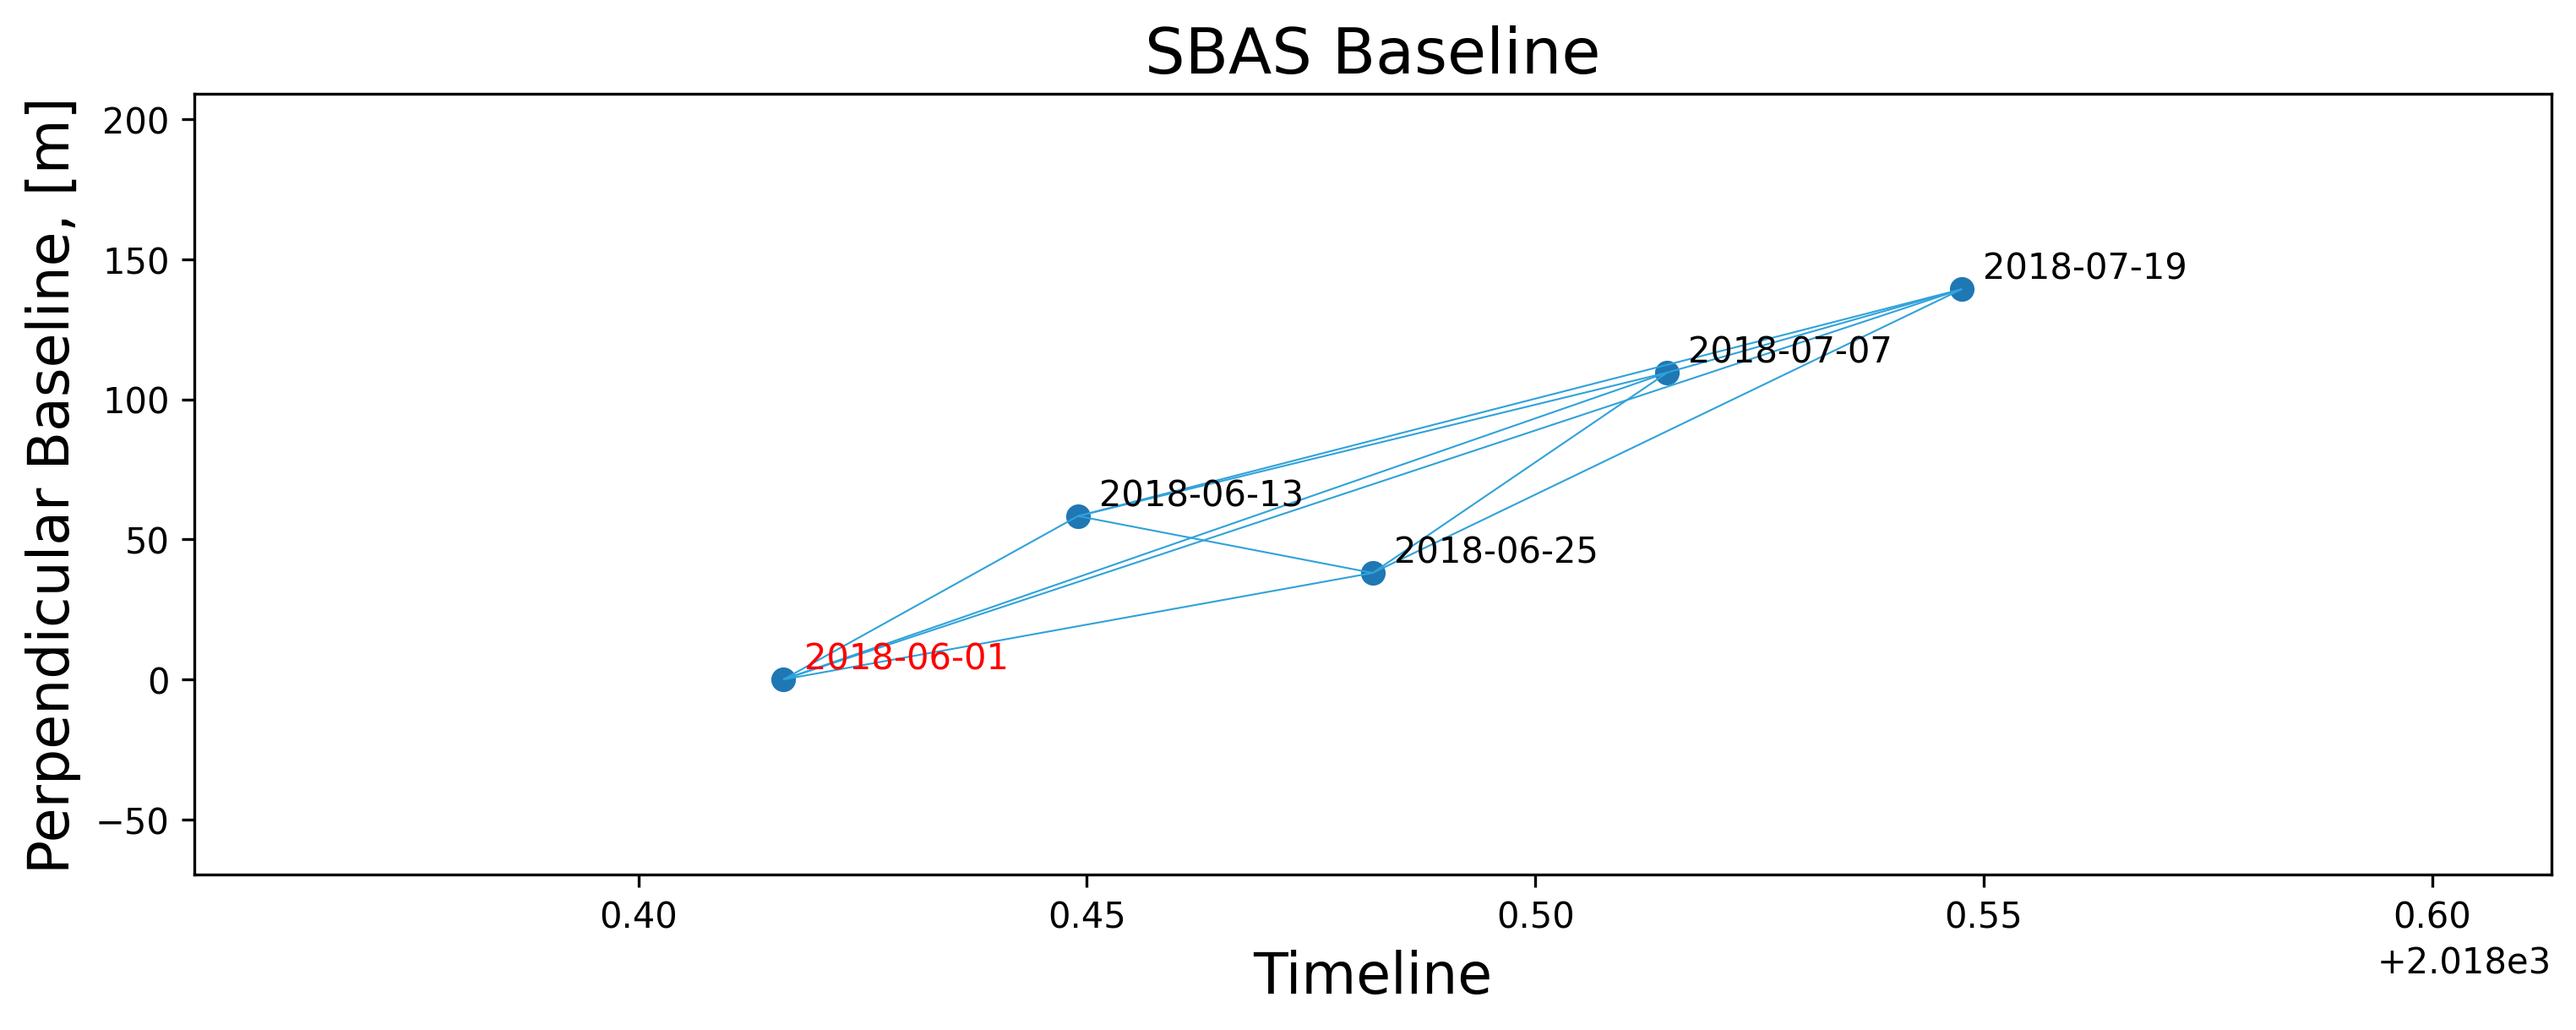

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
ax = plt.gca()

lines = [[(row.ref_date.year+row.ref_date.day_of_year/365.25, row.ref_baseline),
          (row.rep_date.year+row.rep_date.day_of_year/365.25, row.rep_baseline)]
         for row in baseline_pairs.itertuples()]
lc = matplotlib.collections.LineCollection(lines, colors='#30a2da', linewidths=0.5)
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.5)
bs1 = baseline_pairs[['ref_date','ref_baseline']].values
bs2 = baseline_pairs[['rep_date','rep_baseline']].values
df = pd.DataFrame(np.concatenate([bs1, bs2]), columns=['date','baseline']).drop_duplicates()
df['timeline'] = df.date.dt.year + df.date.dt.day_of_year/365.25
plt.scatter(x=df.timeline, y=df.baseline)
for label,y,x in df.values:
    plt.annotate(str(label.date()), (x,y), textcoords="offset points", xytext=(35,3), ha='center',
                 c='red' if str(label.date()) == REFERENCE else 'black')
ax.set_xlabel('Timeline', fontsize=16)
ax.set_ylabel('Perpendicular Baseline, [m]', fontsize=16)
ax.set_title('SBAS Baseline', fontsize=18)
plt.show()

## Geocoding

In [ ]:
# use default 60m coordinates grid
sbas.compute_geocode()

Radar Transform Computing:   0%|          | 0/6 [00:00<?, ?it/s]

Radar Transform Saving:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

INFO:distributed.scheduler:Receive client connection: Client-worker-f3fbc961-81c0-11ee-95ac-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:53008


Radar Transform Indexing:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Radar Inverse Transform Computing:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

Satellite Look Vector Computing:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

### DEM in Radar Coordinates

The grids are NetCDF files processing as xarray DataArrays.

In [ ]:
topo = sbas.get_topo()

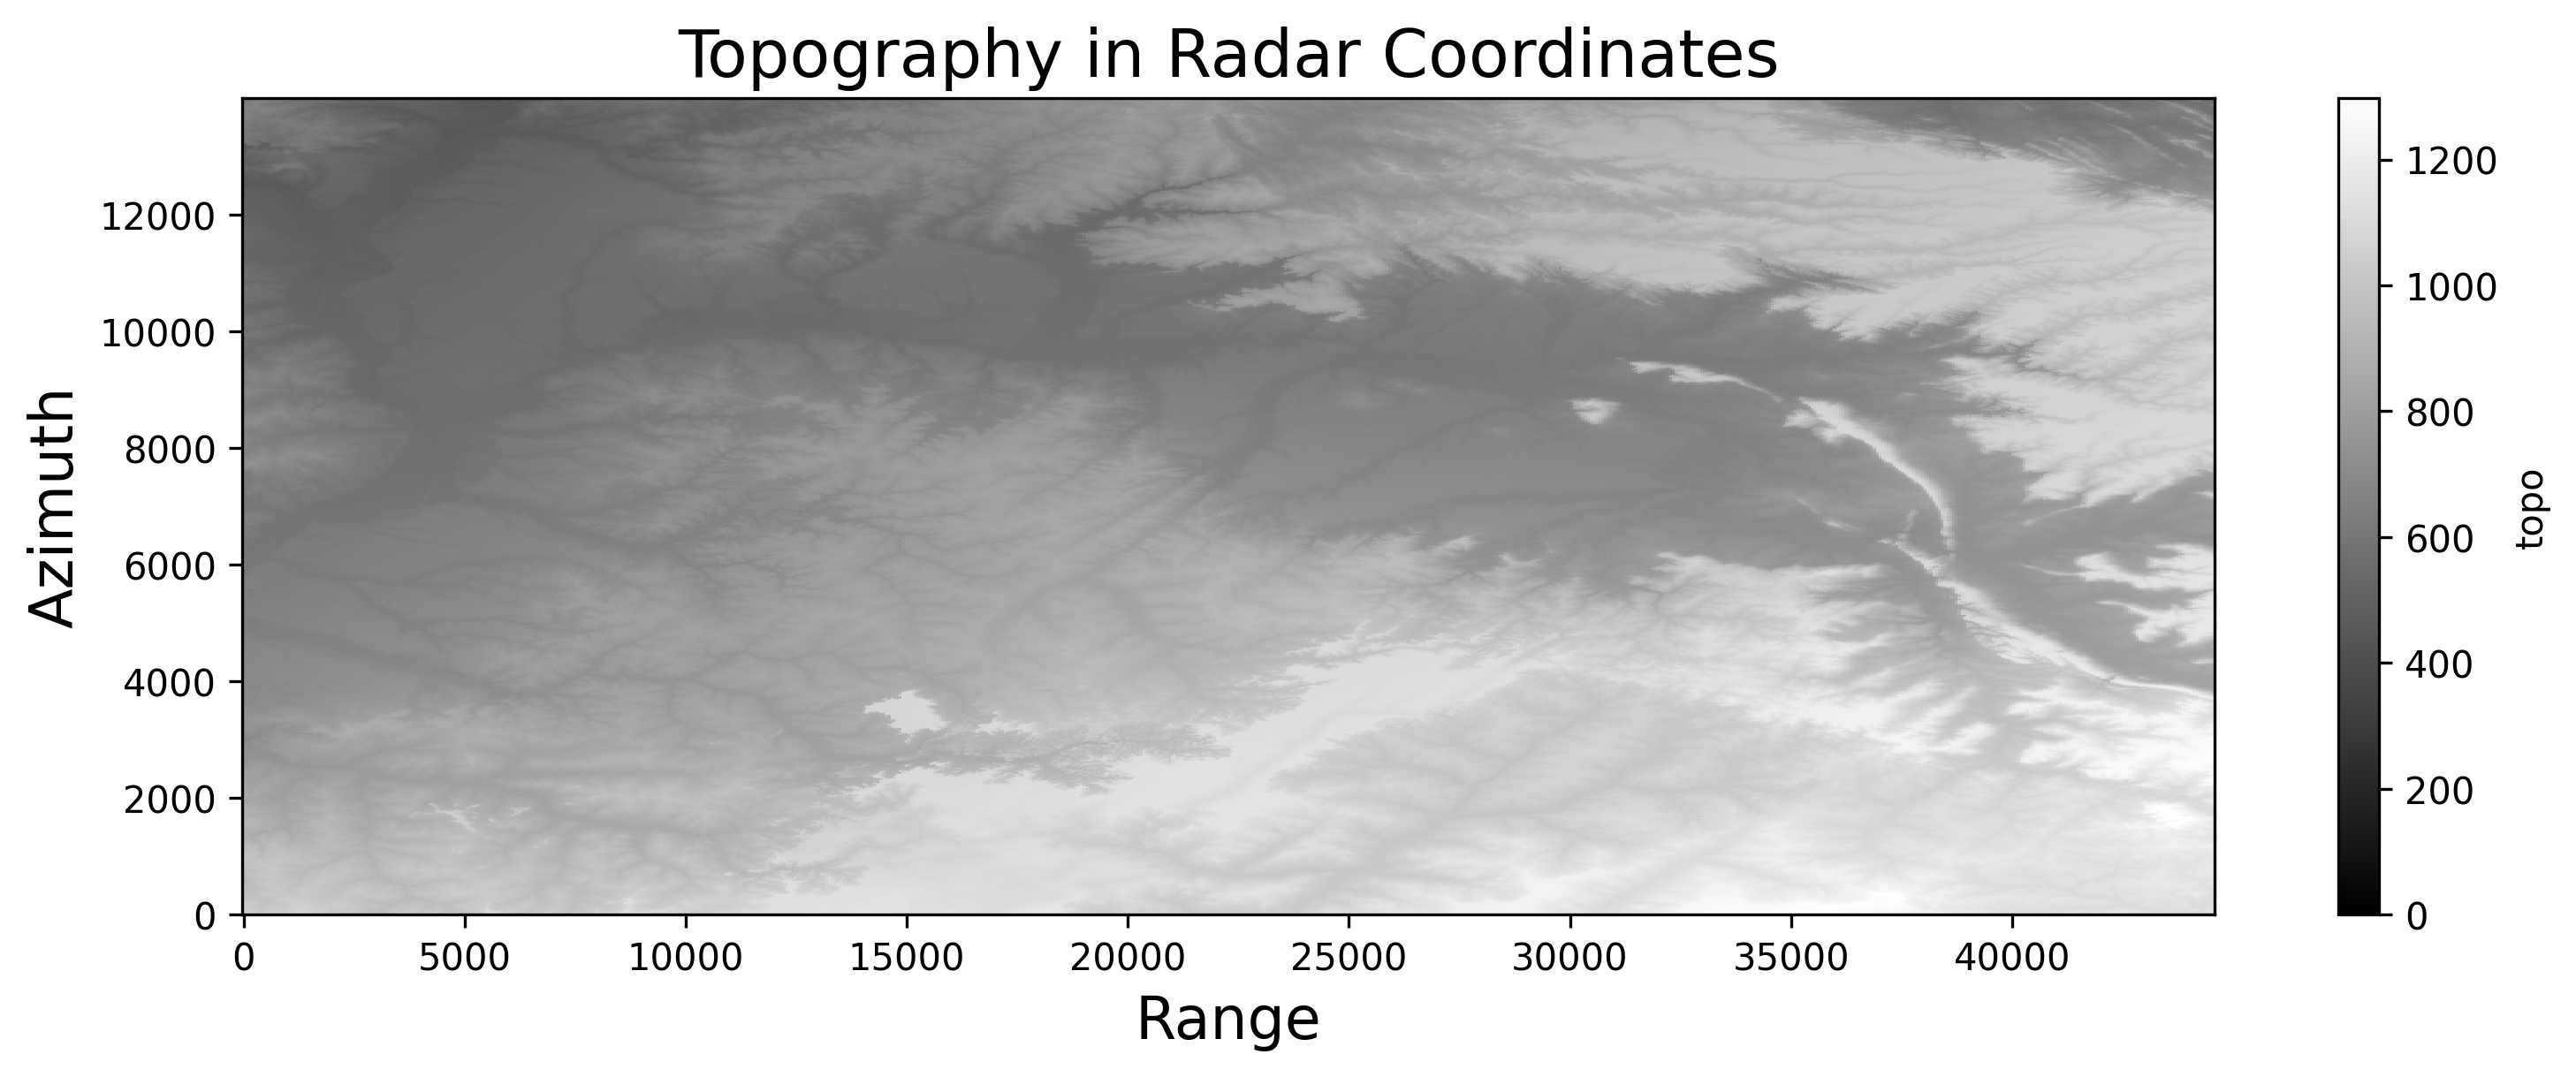

In [ ]:
plt.figure(figsize=(12,4), dpi=300)
topo[::4,::4].plot.imshow(cmap='gray', vmin=0)
plt.xlabel('Range', fontsize=16)
plt.ylabel('Azimuth', fontsize=16)
plt.title('Topography in Radar Coordinates', fontsize=18)
plt.show()

## Interferograms

Define a single interferogram or a SBAS series. Make direct and reverse interferograms (from past to future or from future to past).

Decimation is useful to save disk space. Geocoding results are always produced on the provided DEM grid so the output grid and resolution are the same to the DEM. By this way, ascending and descending orbit results are always defined on the same grid by design. An internal processing cell is about 30 x 30 meters size and for default output 60m resolution (like to GMTSAR and GAMMA software) decimation 2x2 is reasonable. For the default wavelength=200 for Gaussian filter 1/4 of wavelength is approximately equal to ~60 meters and better resolution is mostly useless (while it can be used for small objects detection). For wavelength=400 meters use 90m DEM resolution with decimation 4x4.

The grids are NetCDF files processing as xarray DataArrays.

In [ ]:
pairs = baseline_pairs[['ref_date', 'rep_date']]
pairs

,ref_date,rep_date
0,2018-06-01,2018-06-13
1,2018-06-01,2018-06-25
2,2018-06-01,2018-07-07
3,2018-06-01,2018-07-19
4,2018-06-13,2018-06-25
5,2018-06-13,2018-07-07
6,2018-06-13,2018-07-19
7,2018-06-25,2018-07-07
8,2018-06-25,2018-07-19
9,2018-07-07,2018-07-19


In [ ]:
data = sbas.multilooking(np.abs(sbas.open_data()), wavelength=400, coarsen=(1,4))

In [ ]:
phase = sbas.multilooking(sbas.phasediff(pairs), wavelength=400, coarsen=(1,4))

In [ ]:
corr = sbas.correlation(phase, data)

In [ ]:
# Goldstein filter expects square grid cells produced using multilooking with coarsen=(1,4)
intf_filt = sbas.interferogram(sbas.goldstein(phase, corr, 32))

In [ ]:
# use default 60m resolution
decimator = sbas.decimator()

In [ ]:
# compute together because correlation depends on phase, and filtered phase depends on correlation.
tqdm_dask(result := dask.persist(decimator(corr), decimator(intf_filt)), desc='Compute Phase and Correlation')
# unpack results
corr60m, intf60m = result
#11954/11954 [02:30<00:00, 17.81it/s]

Compute Phase and Correlation:   0%|          | 0/9000000.0 [00:00<?, ?it/s]

INFO:distributed.core:Event loop was unresponsive in Nanny for 6.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 6.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 6.80s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


In [ ]:
fg = intf60m.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    vmin=-np.pi, vmax=np.pi, cmap='gist_rainbow_r'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Filtered Phase, [rad]', y=1.05, fontsize=24)
plt.show()

In [ ]:
fg = corr60m.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    clim=(0, 0.8), cmap='gray'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Correlation', y=1.05, fontsize=24)
plt.show()

## Unwrapping

Unwrapping process requires a lot of RAM and that's really RAM consuming when a lot of parallel proccesses running togeter. To limit the parallel processing tasks apply argument "n_jobs". The default value n_jobs=-1 means all the processor cores van be used. Also, use interferogram decimation above to produce smaller interferograms. And in addition a custom SNAPHU configuration can reduce RAM usage as explained below.

Attention: in case of crash on MacOS Apple Silicon run Jupyter as

`OBJC_DISABLE_INITIALIZE_FORK_SAFETY=YES no_proxy='*' jupyter notebook`

In [ ]:
CORRLIMIT = 0.075
tqdm_dask(unwrap := sbas.unwrap_snaphu(intf60m, corr60m.where(corr60m>=CORRLIMIT)).persist(),
          desc='SNAPHU Unwrapping')

In [ ]:
zmin, zmax = np.nanquantile(unwrap.phase, [0.01, 0.99])
fg = unwrap.phase.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Unwrapped Phase, [rad]', y=1.05, fontsize=24)
plt.show()

In [ ]:
tqdm_dask(los_disp_mm_ll := sbas.ra2ll(unwrap.phase).persist(), desc='Geocoding')

In [ ]:
zmin, zmax = np.nanquantile(los_disp_mm_ll, [0.01, 0.99])
fg = los_disp_mm_ll.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Unwrapped Phase in Geographic Coordinates, [rad]', y=1.05, fontsize=24)
plt.show()

### Detrend Unwrapped Phase

Remove trend and apply gaussian filter to fix ionospheric effects and solid Earh's tides.

In [ ]:
tqdm_dask(detrend := (unwrap.phase - sbas.gaussian(unwrap.phase, wavelength=60000)).persist(),
          desc='Detrending')

In [ ]:
zmin, zmax = np.nanquantile(detrend, [0.01, 0.99])
fg = detrend.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Detrended Unwrapped Phase, [rad]', y=1.05, fontsize=24)
plt.show()

In [ ]:
detrend_subset = detrend.sel(x=slice(9000,12000), y=slice(1800,2700))

zmin, zmax = np.nanquantile(detrend_subset, [0.01, 0.99])
fg = detrend_subset.plot.imshow(
    col="pair",
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Detrended Unwrapped Phase AOI, [rad]', y=1.05, fontsize=24)
plt.show()

### Calculate Displacement Using Coherence-Weighted Least-Squares Solution

In [ ]:
# calculate phase displacement in radians and convert to LOS displacement in millimeter
tqdm_dask(disp := sbas.los_displacement_mm(sbas.lstsq(detrend, corr60m)).persist(), desc='SBAS Computing')
# clean 1st zero-filled displacement map for better visualization
disp[0] = np.nan

In [ ]:
zmin, zmax = np.nanquantile(disp, [0.01, 0.99])
fg = disp.plot.imshow(
    col="date",
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Cumulative LOS Displacement, [mm]', y=1.05, fontsize=24)
plt.show()

In [ ]:
disp_subset = disp.sel(x=slice(9000,12000), y=slice(1800,2700))

zmin, zmax = np.nanquantile(disp_subset, [0.01, 0.99])
fg = disp_subset.plot.imshow(
    col='date',
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_axis_labels('Range', 'Azimuth')
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Cumulative LOS Displacement AOI, [mm]', y=1.05, fontsize=24)
plt.show()

In [ ]:
# geocode subset on the full interferogram grid and crop a valid area only
tqdm_dask(disp_subset_ll := sbas.cropna(sbas.ra2ll(disp.sel(x=slice(9000,12000), y=slice(1800,2700)))).persist(),
          desc='SBAS Computing')

In [ ]:
zmin, zmax = np.nanquantile(disp_subset_ll, [0.01, 0.99])
fg = disp_subset_ll.plot.imshow(
    col='date',
    col_wrap=3, size=4, aspect=1.2,
    vmin=zmin, vmax=zmax, cmap='jet'
)
fg.set_ticks(max_xticks=5, max_yticks=5, fontsize='medium')
fg.fig.suptitle('Cumulative LOS Displacement in Geographic Coordinates AOI, [mm]', y=1.05, fontsize=24)
plt.show()

In [ ]:
# prepare topography and phase
dem_subset = dem.interp_like(disp_subset_ll).where(np.isfinite(disp_subset_ll[-1]))
for idx, date in enumerate(disp_subset_ll.date):
    ds = xr.merge([dem_subset.rename('z'), disp_subset_ll.sel(date=date)], compat='override').rename({'lat': 'y', 'lon': 'x'})
    # decimate large grid
    #ds = ds.sel(y=ds.y[::3], x=ds.x[::3])
    # convert to VTK structure
    vtk_grid = pv.StructuredGrid(NCubeVTK.ImageOnTopography(ds))
    vtk_grid.save(f'disp_subset.{idx}.vtk')
vtk_grid

In [ ]:
# build interactive 3D plot
def load_mesh(plotter, index, offset=None):
    vtk_grid = pv.read(f'disp_subset.{index}.vtk')
    if offset:
        vtk_grid.points[:, 2] += offset
    vtk_grid = vtk_grid.scale([1, 1, 0.0002], inplace=True)
    plotter.add_mesh(vtk_grid, scalars='los', cmap='turbo', clim=(-30,10), opacity=0.5, ambient=0.5, label=str(index))

plotter = pv.Plotter(notebook=True)
load_mesh(plotter, 1, 0)
load_mesh(plotter, 2, 200)
load_mesh(plotter, 3, 400)
load_mesh(plotter, 4, 600)
plotter.show_axes()
plotter.add_title(f'Interactive LOS Displacements on DEM', font_size=32)
#p.show(screenshot='intf.png', jupyter_backend='panel', return_viewer=True)
plotter._on_first_render_request()
panel.panel(
    plotter.render_window, orientation_widget=plotter.renderer.axes_enabled,
    enable_keybindings=False, sizing_mode='stretch_width', min_height=600
)

In [ ]:
plotter = pv.Plotter(shape=(2, 2), notebook=True)

def load_mesh(plotter, index):
    vtk_grid = pv.read(f'disp_subset.{index}.vtk').scale([1, 1, 0.0002], inplace=True)
    plotter.add_mesh(vtk_grid, scalars='los', cmap='turbo', clim=(-30,10), ambient=0.1, label=str(index))
    plotter.add_title(str(disp_subset_ll.isel(date=index).date.dt.date.item()), font_size=24)

plotter.subplot(0, 0)
load_mesh(plotter, 1)

plotter.subplot(0, 1)
load_mesh(plotter, 2)

plotter.subplot(1, 0)
load_mesh(plotter, 3)
plotter.show_axes()

plotter.subplot(1, 1)
load_mesh(plotter, 4)

plotter.subplot(0, 1)
plotter.add_legend(loc='upper center')
plotter.show_axes()
plotter._on_first_render_request()
panel.panel(
    plotter.render_window, orientation_widget=plotter.renderer.axes_enabled,
    enable_keybindings=False, sizing_mode='stretch_width', min_height=600
)

## Pixel Displacement

In [ ]:
# define point coordinates
lat = 32.43
lon = -115.15

# find nearest pixel to the defined coordinates
# first zero replaced by NaN so convert it back to zero
disp_ll_pixel = sbas.ra2ll(disp_subset).sel(lat=lat, lon=lon, method='nearest').fillna(0)

In [ ]:
disp_ll_pixel.plot.scatter('date')
disp_ll_pixel.plot(lw=0.25)
plt.title(f'Cumulative LOS Displacement, [mm]\nlat={lat}, lon={lon}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Displacement, [mm]', fontsize=16)
plt.grid()
plt.show()

## Conclusion

For now you have the full control on interferometry processing and unwrapping and able to run it everywhere: on free of charge Google Colab instances, on local MacOS and Linux computers and on Amazon EC2 and Google Cloud VM and AI Notebook instances.